# DATA ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data.csv")

df

,Std,ID,Material,Heat treatment,ultimate tensile strength,yeild strength,elongation at break,brinell hardness number,elastic modulus,shear modulus,poissons ratio,density,pH,Desc,HV
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.30,7860,NaN,NaN,NaN
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.30,7860,NaN,NaN,NaN
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.30,7860,NaN,NaN,NaN
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.30,7860,NaN,NaN,NaN
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.30,7860,550.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,JIS,512A80EC21EA416BA2725B38BA8096EF,Nodular cast iron,NaN,600,370,NaN,NaN,169000,70000,0.20,7160,480.0,Nodular cast iron,210.0
1548,JIS,38526441BA8741CA979DBF870D0B8A9B,Nodular cast iron,NaN,700,420,NaN,NaN,169000,70000,0.20,7160,560.0,Nodular cast iron,230.0
1549,JIS,CAC03D7EB1AA45E68EFF92A2EF4C3D9B,Nodular cast iron,NaN,800,480,NaN,NaN,169000,70000,0.20,7160,600.0,Nodular cast iron,240.0
1550,JIS,45C82A36EC644F8BB6170A99ED819B62,Malleable cast iron,NaN,400,180,4.0,NaN,160000,64000,0.27,7160,300.0,Malleable cast iron,220.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Std                        1552 non-null   object 
 1   ID                         1552 non-null   object 
 2   Material                   1552 non-null   object 
 3   Heat treatment             802 non-null    object 
 4   ultimate tensile strength  1552 non-null   int64  
 5   yeild strength             1552 non-null   object 
 6   elongation at break        1346 non-null   float64
 7   brinell hardness number    463 non-null    float64
 8   elastic modulus            1552 non-null   int64  
 9   shear modulus              1552 non-null   int64  
 10  poissons ratio             1552 non-null   float64
 11  density                    1552 non-null   int64  
 12  pH                         193 non-null    float64
 13  Desc                       981 non-null    objec

In [4]:
df.isnull().sum()

Std                             0
ID                              0
Material                        0
Heat treatment                750
ultimate tensile strength       0
yeild strength                  0
elongation at break           206
brinell hardness number      1089
elastic modulus                 0
shear modulus                   0
poissons ratio                  0
density                         0
pH                           1359
Desc                          571
HV                           1387
dtype: int64

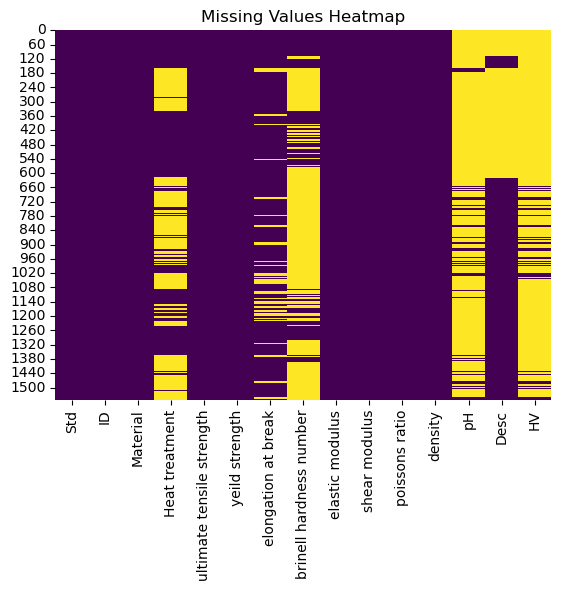

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Since "HV" "pH" "Brinell hardness number" & "Heat Treatment" has very high amount of missing values compared to the size of the dataset, it's better to remove them completely

In [6]:
df=df.drop(columns=["pH","HV"])
df

,Std,ID,Material,Heat treatment,ultimate tensile strength,yeild strength,elongation at break,brinell hardness number,elastic modulus,shear modulus,poissons ratio,density,Desc
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.30,7860,NaN
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.30,7860,NaN
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.30,7860,NaN
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.30,7860,NaN
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.30,7860,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,JIS,512A80EC21EA416BA2725B38BA8096EF,Nodular cast iron,NaN,600,370,NaN,NaN,169000,70000,0.20,7160,Nodular cast iron
1548,JIS,38526441BA8741CA979DBF870D0B8A9B,Nodular cast iron,NaN,700,420,NaN,NaN,169000,70000,0.20,7160,Nodular cast iron
1549,JIS,CAC03D7EB1AA45E68EFF92A2EF4C3D9B,Nodular cast iron,NaN,800,480,NaN,NaN,169000,70000,0.20,7160,Nodular cast iron
1550,JIS,45C82A36EC644F8BB6170A99ED819B62,Malleable cast iron,NaN,400,180,4.0,NaN,160000,64000,0.27,7160,Malleable cast iron


since rest of the features don't have as much missing values we'll apply median imputation for numerical columns and mode imputation for categorical to replace them.

In [7]:
num_cols = ["elongation at break","brinell hardness number"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_col="Heat treatment"
df[cat_col]=df[cat_col].fillna(df[cat_col].mode()[0])

df

,Std,ID,Material,Heat treatment,ultimate tensile strength,yeild strength,elongation at break,brinell hardness number,elastic modulus,shear modulus,poissons ratio,density,Desc
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.30,7860,NaN
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.30,7860,NaN
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.30,7860,NaN
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.30,7860,NaN
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.30,7860,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,JIS,512A80EC21EA416BA2725B38BA8096EF,Nodular cast iron,Wrought,600,370,16.0,170.0,169000,70000,0.20,7160,Nodular cast iron
1548,JIS,38526441BA8741CA979DBF870D0B8A9B,Nodular cast iron,Wrought,700,420,16.0,170.0,169000,70000,0.20,7160,Nodular cast iron
1549,JIS,CAC03D7EB1AA45E68EFF92A2EF4C3D9B,Nodular cast iron,Wrought,800,480,16.0,170.0,169000,70000,0.20,7160,Nodular cast iron
1550,JIS,45C82A36EC644F8BB6170A99ED819B62,Malleable cast iron,Wrought,400,180,4.0,170.0,160000,64000,0.27,7160,Malleable cast iron


One-hot encoding "heat treatment" for evaluation

In [8]:
df = pd.get_dummies(df, columns=["Heat treatment"], prefix="HT")
df

,Std,ID,Material,ultimate tensile strength,yeild strength,elongation at break,brinell hardness number,elastic modulus,shear modulus,poissons ratio,...,HT_heat treated,HT_nitrided,HT_nitro-carburized,HT_nitro-case-hard.,HT_normalized,HT_pressure die casting,HT_sand casting,HT_tempered at 400 F,HT_tempered at 600 F,HT_tempered at 800 F
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,421,314,39.0,126.0,207000,79000,0.30,...,False,False,False,False,False,False,False,False,False,False
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,424,324,37.0,121.0,207000,79000,0.30,...,False,False,False,False,True,False,False,False,False,False
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,386,284,37.0,111.0,207000,79000,0.30,...,False,False,False,False,False,False,False,False,False,False
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,448,331,36.0,143.0,207000,79000,0.30,...,False,False,False,False,False,False,False,False,False,False
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,441,346,35.8,131.0,207000,79000,0.30,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,JIS,512A80EC21EA416BA2725B38BA8096EF,Nodular cast iron,600,370,16.0,170.0,169000,70000,0.20,...,False,False,False,False,False,False,False,False,False,False
1548,JIS,38526441BA8741CA979DBF870D0B8A9B,Nodular cast iron,700,420,16.0,170.0,169000,70000,0.20,...,False,False,False,False,False,False,False,False,False,False
1549,JIS,CAC03D7EB1AA45E68EFF92A2EF4C3D9B,Nodular cast iron,800,480,16.0,170.0,169000,70000,0.20,...,False,False,False,False,False,False,False,False,False,False
1550,JIS,45C82A36EC644F8BB6170A99ED819B62,Malleable cast iron,400,180,4.0,170.0,160000,64000,0.27,...,False,False,False,False,False,False,False,False,False,False


**Since desc is a text column which is unneccesary for k-means we'll remove that as well**

In [9]:
df=df.drop(columns=["Desc"])

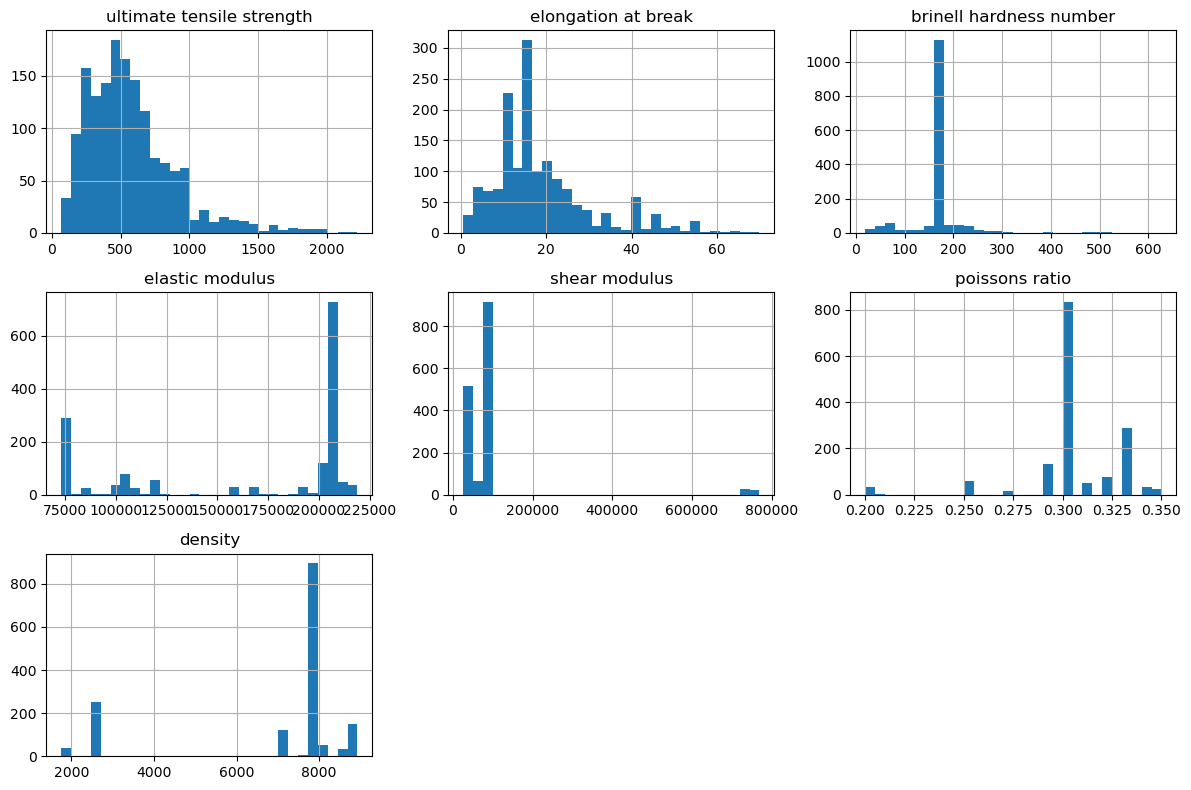

In [10]:
df.hist(figsize=(12,8),bins=30)
plt.tight_layout()
plt.show()

*Since features "ID","std" and "material" are categorical, they're not much usefull for clustering hence we'll be dropping them as well*

In [11]:
df=df.drop(columns=["ID","Material","Std"])
df.head()

,ultimate tensile strength,yeild strength,elongation at break,brinell hardness number,elastic modulus,shear modulus,poissons ratio,density,HT_1/2-hard,HT_1/4-hard,...,HT_heat treated,HT_nitrided,HT_nitro-carburized,HT_nitro-case-hard.,HT_normalized,HT_pressure die casting,HT_sand casting,HT_tempered at 400 F,HT_tempered at 600 F,HT_tempered at 800 F
0,421,314,39.0,126.0,207000,79000,0.3,7860,False,False,...,False,False,False,False,False,False,False,False,False,False
1,424,324,37.0,121.0,207000,79000,0.3,7860,False,False,...,False,False,False,False,True,False,False,False,False,False
2,386,284,37.0,111.0,207000,79000,0.3,7860,False,False,...,False,False,False,False,False,False,False,False,False,False
3,448,331,36.0,143.0,207000,79000,0.3,7860,False,False,...,False,False,False,False,False,False,False,False,False,False
4,441,346,35.8,131.0,207000,79000,0.3,7860,False,False,...,False,False,False,False,True,False,False,False,False,False


*Since the "yeild strength" feature had been classified as object we need to transform it to float so it can used for numerical feature analysis*

In [12]:
df['yeild strength'] = df['yeild strength'].str.replace(' max', '', regex=False).astype(float)

df

,ultimate tensile strength,yeild strength,elongation at break,brinell hardness number,elastic modulus,shear modulus,poissons ratio,density,HT_1/2-hard,HT_1/4-hard,...,HT_heat treated,HT_nitrided,HT_nitro-carburized,HT_nitro-case-hard.,HT_normalized,HT_pressure die casting,HT_sand casting,HT_tempered at 400 F,HT_tempered at 600 F,HT_tempered at 800 F
0,421,314.0,39.0,126.0,207000,79000,0.30,7860,False,False,...,False,False,False,False,False,False,False,False,False,False
1,424,324.0,37.0,121.0,207000,79000,0.30,7860,False,False,...,False,False,False,False,True,False,False,False,False,False
2,386,284.0,37.0,111.0,207000,79000,0.30,7860,False,False,...,False,False,False,False,False,False,False,False,False,False
3,448,331.0,36.0,143.0,207000,79000,0.30,7860,False,False,...,False,False,False,False,False,False,False,False,False,False
4,441,346.0,35.8,131.0,207000,79000,0.30,7860,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,600,370.0,16.0,170.0,169000,70000,0.20,7160,False,False,...,False,False,False,False,False,False,False,False,False,False
1548,700,420.0,16.0,170.0,169000,70000,0.20,7160,False,False,...,False,False,False,False,False,False,False,False,False,False
1549,800,480.0,16.0,170.0,169000,70000,0.20,7160,False,False,...,False,False,False,False,False,False,False,False,False,False
1550,400,180.0,4.0,170.0,160000,64000,0.27,7160,False,False,...,False,False,False,False,False,False,False,False,False,False


# Now we're left with our cleaned dataset with useful features. we'll now be using heatmap for visualisation and scaling the columns for better results

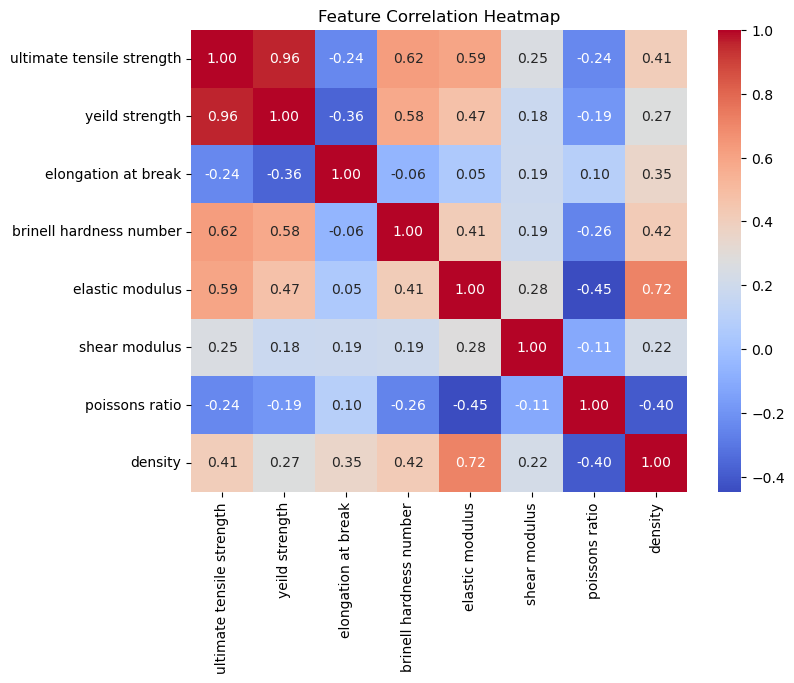

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



In [14]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

print(X_scaled_df.head())


   ultimate tensile strength  yeild strength  elongation at break  \
0                  -0.464461       -0.252291             1.730999   
1                  -0.455279       -0.217736             1.558867   
2                  -0.571583       -0.355958             1.558867   
3                  -0.381824       -0.193547             1.472802   
4                  -0.403248       -0.141713             1.455588   

   brinell hardness number  elastic modulus  shear modulus  poissons ratio  \
0                -0.743831         0.756067       -0.05267       -0.121096   
1                -0.824455         0.756067       -0.05267       -0.121096   
2                -0.985703         0.756067       -0.05267       -0.121096   
3                -0.469708         0.756067       -0.05267       -0.121096   
4                -0.663206         0.756067       -0.05267       -0.121096   

    density  HT_1/2-hard  HT_1/4-hard  ...  HT_heat treated  HT_nitrided  \
0  0.439896    -0.035921    -0.050833  .

# Applying PCA and t-SNE

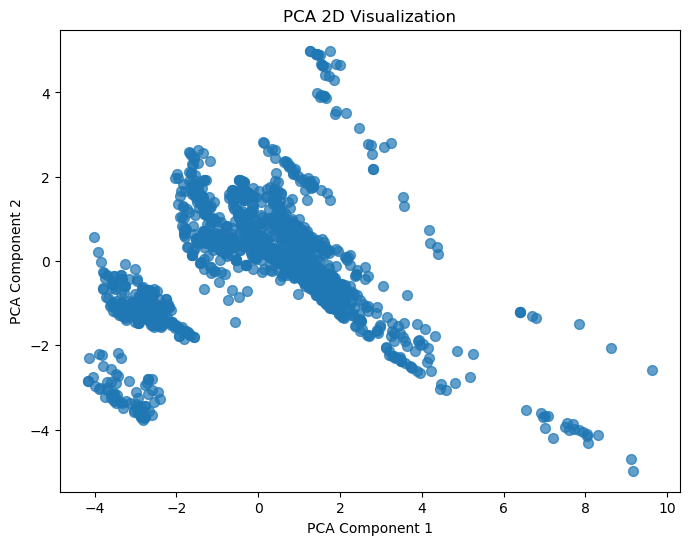

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=50, alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA 2D Visualization")
plt.show()


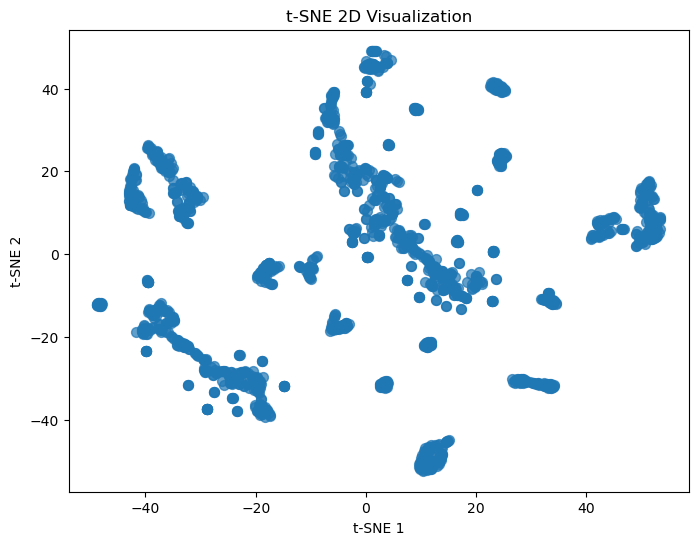

In [16]:
from sklearn.manifold import TSNE

# Reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=50, alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE 2D Visualization")
plt.show()


# Making our model using k-means as the pca plot dosent show clear dense regions for us to use DBSCAN, hence we'll use k means

*importing necessary libraries*

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

*using silhouette score analysis for finding optimal number of K*

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


For k = 2, Silhouette Score = 0.5006
For k = 3, Silhouette Score = 0.5119


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


For k = 4, Silhouette Score = 0.4704
For k = 5, Silhouette Score = 0.5008


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


For k = 6, Silhouette Score = 0.4863
For k = 7, Silhouette Score = 0.4854


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


For k = 8, Silhouette Score = 0.4275
For k = 9, Silhouette Score = 0.4285


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


For k = 10, Silhouette Score = 0.4478


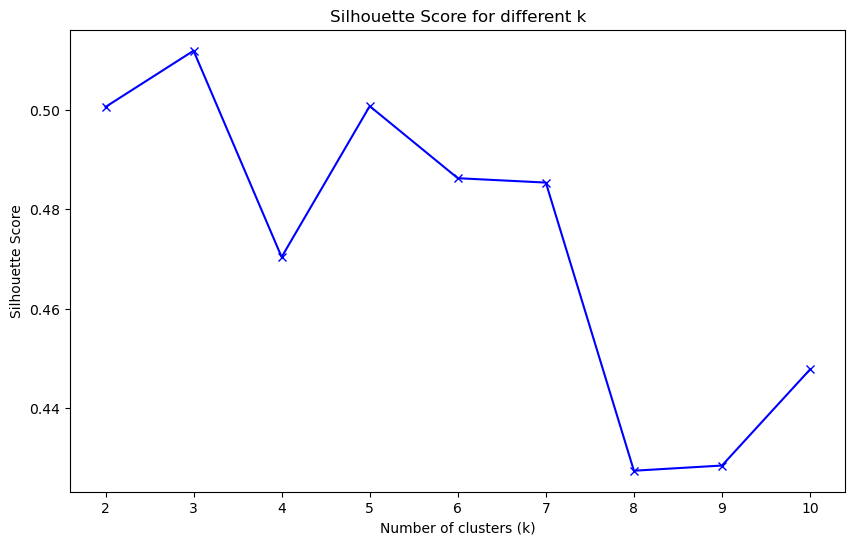

In [18]:
# Calculate silhouette score for a range of k values
silhouette_scores = []
k_range = range(2, 11) # k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"For k = {k}, Silhouette Score = {score:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k')
plt.show()

*from analysis we can see silhouette score is highest for k=2*

In [19]:
# Apply K-Means with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_pca)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


# visualising our clusters

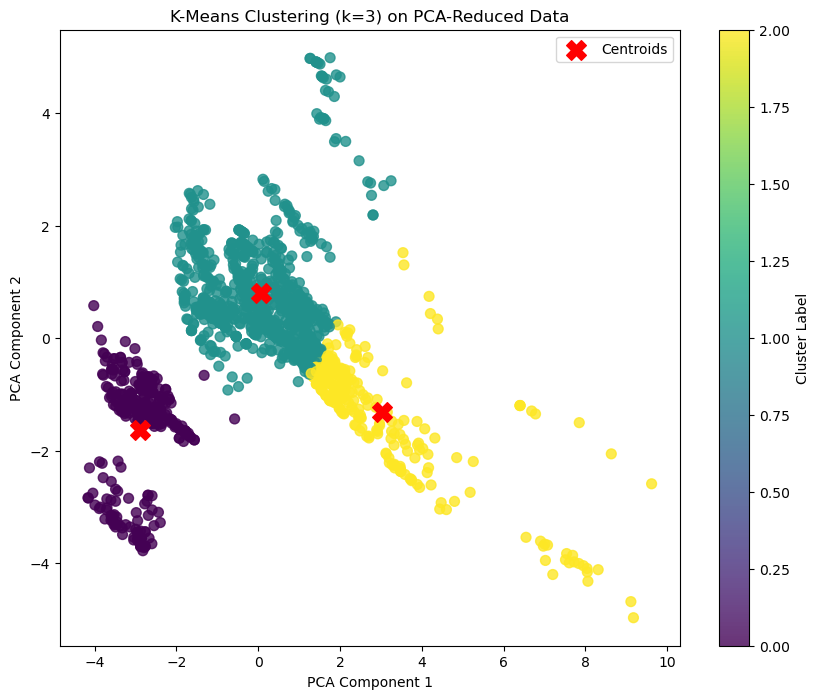

In [20]:
# Create a scatter plot of the PCA data, colored by the K-Means labels
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.8)

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering (k={optimal_k}) on PCA-Reduced Data')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [21]:
final_score = silhouette_score(X_pca, kmeans_labels)
print(f"Final Silhouette Score for k={optimal_k}: {final_score:.4f}")

Final Silhouette Score for k=3: 0.5119


In [22]:
df["Cluster"] = kmeans_labels
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)


         ultimate tensile strength  yeild strength  elongation at break  \
Cluster                                                                   
0                       273.858621      200.337931            12.144828   
1                       523.449851      317.360477            22.621748   
2                      1107.372549      874.352941            11.809020   

         brinell hardness number  elastic modulus  shear modulus  \
Cluster                                                            
0                     114.158621     73220.689655   26096.551724   
1                     174.468719    180393.247269   94772.989076   
2                     228.819608    205980.392157  117039.215686   

         poissons ratio      density  HT_1/2-hard  HT_1/4-hard  ...  \
Cluster                                                         ...   
0              0.329931  2620.862069     0.000000     0.000000  ...   
1              0.296574  7937.131082     0.000000     0.003972  ...   

In [23]:
import joblib
cluster_names = {
    0: "Lightweight alloys",
    1: "Structural steels",
    2: "High-strength hardened steels"
}
model_data = {
    'model': kmeans,
    'cluster_names': cluster_names
}
joblib.dump(model_data, 'kmeans_materials.pkl')

joblib.dump(pca, 'pca_transformer.pkl')



['pca_transformer.pkl']

In [24]:
df.mean()

ultimate tensile strength                                572.753222
yeild strength                                           387.010309
elongation at break                                       18.887500
brinell hardness number                                  172.129510
elastic modulus                                       164571.520619
shear modulus                                          85598.840206
poissons ratio                                             0.302977
density                                                 6929.843428
HT_1/2-hard                                                0.001289
HT_1/4-hard                                                0.002577
HT_3/4-hard                                                0.001289
HT_Annealing                                               0.000644
HT_Annealing or high tempering                             0.005799
HT_As extruded                                             0.007088
HT_As hot rolled                                